In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Пример задачи<a class="anchor" id="example"></a><center>

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [2]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

In [3]:
X.shape

(10, 2)

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

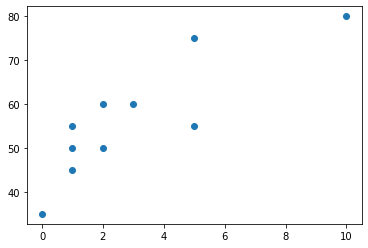

In [5]:
plt.scatter(X[:, 1], y);

Уравнение прямой: $y = a*x + b$

In [6]:
y_pred1 = 5 * X[:, 1] + 35 * X[:, 0]
y_pred2 = 7.5 * X[:, 1] + 40 * X[:, 0]

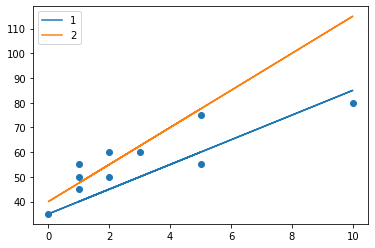

In [7]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred1, label='1')
plt.plot(X[:, 1], y_pred2, label='2')
plt.legend()
plt.show()

Отклонение

In [8]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65, -60.0)

MAE (Mean Absolute Error)

In [9]:
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))
mae_1, mae_2

(8.5, 9.0)

MSE (Mean Squared Error)

In [10]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

### Метод наименьших квадратов (МНК)

$$w = (X^{T}X)^{-1}X^{T}y.$$


In [11]:
W_analytical = np.linalg.inv(np.dot(X.T, X)) @ X.T @ y
W_analytical

array([45.0625,  3.8125])

In [12]:
y_pred_analytical = W_analytical[0] * X[:, 0] + W_analytical[1] * X[:, 1]
y_pred_analytical = X @ W_analytical

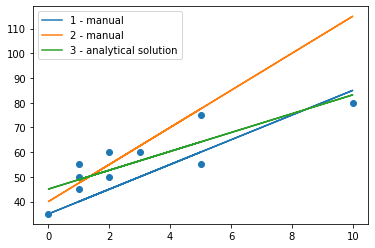

In [13]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred1, label='1 - manual')
plt.plot(X[:, 1], y_pred2, label='2 - manual')
plt.plot(X[:, 1], y_pred_analytical, label='3 - analytical solution')
plt.legend()
plt.show()

In [14]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [15]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [16]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [17]:
calc_mae(y, y_pred_analytical), calc_mse(y, y_pred_analytical)

(5.7875, 43.96875000000001)

### Градиентный спуск

$$\nabla_{w}Q(w,X) = \frac{2}{l}X^{T}(Xw-y).$$

1. Инициализация w

2. Цикл по k = 1,2,3,...:

    * $w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X)$

    * Если $||w^{k} - w^{k-1}|| < \epsilon$, то завершить.


In [18]:
W = np.random.normal(size=(X.shape[1]))
W

array([-1.90317329,  0.78249036])

In [19]:
eta = 0.02 # величина шага

In [20]:
X.shape,  W.shape

((10, 2), (2,))

In [21]:
n = len(y)
dQ = 2/n * X.T @ (X @ W - y) # градиент функции ошибки
dQ

array([-112.11140445, -384.81436764])

In [22]:
grad = eta * dQ
grad

array([-2.24222809, -7.69628735])

In [23]:
print(f'previous weights', W)
W = W - grad
print(f'new weights', W)

previous weights [-1.90317329  0.78249036]
new weights [0.3390548  8.47877771]


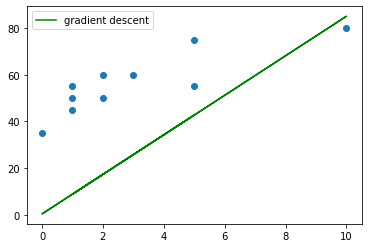

In [24]:
y_pred_grad = X @ W
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred_grad, label='gradient descent', c='g')
plt.legend()
plt.show()

### Домашнее задание <a class="anchor" id="hw"></a><center>

1. Подберите скорость обучения (eta) и количество итераций

In [25]:
n = X.shape[0]
#Изменяю значение eta и n_iter. Подбирал сначала меньше стартового значения, MSE была больше стартовой. Затем поставил 0, это уменьшило mse, потом попробовал 0.1 это дало минимальную MSE. Попробовал следом увеличивать значение, поставил 0.2. При таком значении MSE уже растет, нам этого не нужно.
#Исходя из этого рассуждения посчитал что оптимальная eta = 0.1. Итераций я поставил сначала 10000 и пошел проверять, обнаружил что после 120й итерации цифра не меняется у -2 разряда. Оставил оптимальное значение 120 итераций
eta = 0.1
n_iter = 120

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if i % 10 == 0:
        eta /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')

Number of objects = 10        
Learning rate = 0.1        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [11.8 38.2], MSE = 3047.75
Iteration #10: W_new = [12651.73553914 69617.0969639 ], MSE = 18310954068.05
Iteration #20: W_new = [ 7732434.81888022 42641607.3785219 ], MSE = 9128819654907584.0
Iteration #30: W_new = [1.06344502e+09 5.86454589e+09], MSE = 2.327920364266852e+20
Iteration #40: W_new = [3.00127077e+10 1.65510116e+11], MSE = 2.545133529815946e+23
Iteration #50: W_new = [1.55345341e+11 8.56677968e+11], MSE = 9.572295620500115e+24
Iteration #60: W_new = [1.27742291e+11 7.04456313e+11], MSE = 9.35148012647598e+24
Iteration #70: W_new = [1.38141953e+10 7.61806995e+10], MSE = 1.6408589528283862e+23
Iteration #80: W_new = [1.51674189e+08 8.36432543e+08], MSE = 3.1255335378744607e+19
Iteration #90: W_new = [116395.49982335 641638.79865344], MSE = 31317286806394.33
Iteration #100: W_new = [48.41962396 22.99884644], MSE = 53518.86
Iteration #110: W_new = [44.97713118  3.82798

2*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [26]:
n = X.shape[0]
#По принципу из первого примера, перекалибрую эпсилон и итерации
eta = 1e-2
n_iter = 700

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    #Чтобы решить ошибку матрицу X надо транспонировать. Нельзя матрицу (10, 2) перемножить на вектор (1, 10) по законам линейной алгебры
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #110: W_new = [29.84305573  6.57231156], MSE = 155.08
Iteration #120: W_new = [31.17545797  6.33070096], MSE = 136.48
Iteration #130: W_new = [32.39121367  6.11024241], MSE = 120.99
Iteration #140: W_new = [33.50053475  5.9

In [27]:
#Это вспомогательные принты ко 2ому заданию, чтобы посмотреть типы данных и размерности
print(X)
print(y_pred - y)
print(type(X))
print(type(y_pred - y))
print(np.shape(X))
print(np.shape((y_pred - y).T))

[[ 1  1]
 [ 1  1]
 [ 1  2]
 [ 1  5]
 [ 1  3]
 [ 1  0]
 [ 1  5]
 [ 1 10]
 [ 1  1]
 [ 1  2]]
[  3.81799547  -6.18200453   2.64312198   9.11850154  -3.5317515
   9.99286895 -10.88149846   3.24413412  -1.18200453  -7.35687802]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(10, 2)
(10,)


3*. Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога ε

In [28]:
#Скопирую из 2го примера код сюда
n = X.shape[0]

eta = 1e-2
n_iter = 10000
min_dist = 1e-4
dist = np.inf
i = 0

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')
#Изменю условие на while для отсчета разности норм эпсилон и числа итерации
while dist > min_dist and i < n_iter:
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    #Добавлю вычисление значения нового эпсилон (W++) и сравнивать разность норм
    new_W = W - eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    dist = np.linalg.norm(new_W - W, ord=2)
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')
    #И естественно нужно доавить счетчик, т.к мы ушли от цикла for
    i += 1

#В конце задания подбираю гиперпараметры которые в начале функции, для получения оптимального MSE

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #110: W_new = [29.84305573  6.57231156], MSE = 155.08
Iteration #120: W_new = [31.17545797  6.33070096], MSE = 136.48
Iteration #130: W_new = [32.39121367  6.11024241], MSE = 120.99
Iteration #140: W_new = [33.50053475  5.9